In [20]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from activ import load_data, data_normalization
from sklearn.model_selection import train_test_split, cross_val_score
from activ.pipeline import score_clusters
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from pandas.tools.plotting import table
import h5py
from scipy.stats import entropy

In [13]:
data = load_data()
oc_features = data.outcome_features
oc = data.outcomes
oc.shape

(247, 177)

(array([  5.,   0.,  10.,   0.,  35.,   0.,  41.,   0.,  77.,  79.]),
 array([ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ]),
 <a list of 10 Patch objects>)

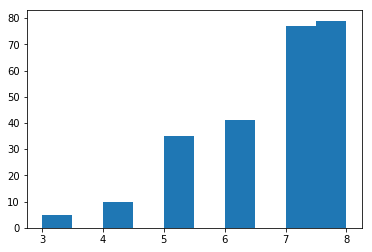

In [24]:
# GOSE_OverallScore3m 
gose = oc[:,4]
plt.hist(gose)

In [16]:
file = '/Users/ahyeon/Desktop/activ misc/sweep_u2-10_c2-50_i50_raw-oc-cluster_uoinmf-bm-predict/umap_clustering_sweep.h5'
f = h5py.File(file, 'r')

In [45]:
umap_dims = f['umap_dimensions'][:]
score = f['score'][:]
norm_score = f['norm_score'][:]
clusters = f['clusters'][:]
cluster_sizes = f['cluster_sizes'][:]
score.shape

(50, 9, 49, 5)

No handles with labels found to put in legend.


(49, 5)


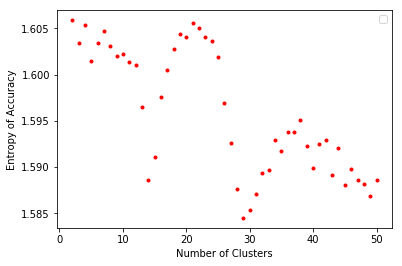

In [52]:
score1 = np.mean(score, axis=1).mean(axis=0)
print(score1.shape)
fig, ax = plt.subplots()
ax.plot(cluster_sizes, entropy(score1.T), '.', color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('Entropy of Accuracy')
ax.legend()


No handles with labels found to put in legend.


(9, 49)


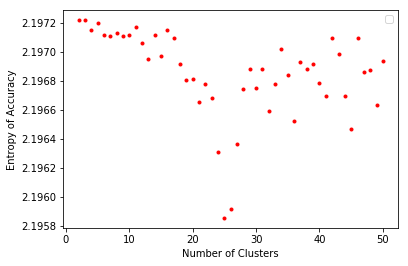

In [53]:
score1 = np.mean(score, axis=0).mean(axis=2)
print(score1.shape)
fig, ax = plt.subplots()
ax.plot(cluster_sizes, entropy(score1), '.', color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('Entropy of Accuracy')
ax.legend()


No handles with labels found to put in legend.


(50, 49)


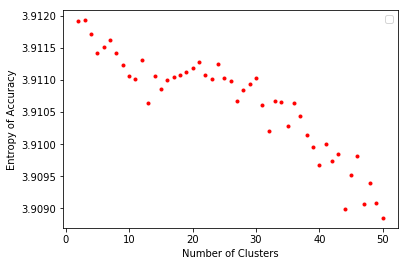

In [54]:
score1 = np.mean(score, axis=1).mean(axis=2)
print(score1.shape)
fig, ax = plt.subplots()
ax.plot(cluster_sizes, entropy(score1), '.', color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('Entropy of Accuracy')
ax.legend()